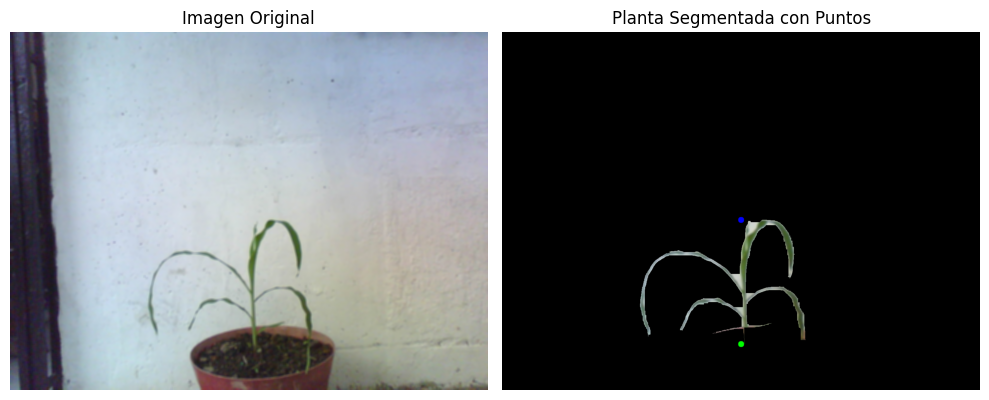

La altura de la planta en píxeles es: 415
Punto superior (fila): 631, Punto inferior (fila): 1046


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen de la planta
img = cv2.imread("/content/sample_data/picture_2024-05-11_17-39-46.jpg")

# Suavizar la imagen para reducir ruido
img = cv2.blur(img, (9, 9))

# Crear una imagen de color negro para la máscara
alto, ancho, canales = img.shape
img2 = np.zeros((alto, ancho), np.uint8)

# Aplicar Canny para detectar bordes
canny = cv2.Canny(img, 5, 100)

# Aplicar closing para cerrar pequeños agujeros en los contornos
kernel = np.ones((30, 30))
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

# Encontrar contornos en la imagen procesada
contornos, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y guardar el área máxima
area_max = 0
contornoMax = None
for cnt in contornos:
    area = cv2.contourArea(cnt)
    if area > area_max:
        area_max = area
        contornoMax = cnt

# Dibujar el contorno máximo en la máscara
if contornoMax is not None:
    cv2.drawContours(img2, [contornoMax], 0, 255, cv2.FILLED)

# Crear la máscara de la imagen de la planta
imgMascara1 = cv2.bitwise_and(img, img, mask=img2)

# Convertir la máscara a escala de grises para facilitar la proyección
img_gray = cv2.cvtColor(imgMascara1, cv2.COLOR_BGR2GRAY)

# Proyección vertical: sumar los valores de los píxeles a lo largo de cada fila
proyeccion_vertical = np.sum(img_gray > 0, axis=1)  # Cuenta píxeles no negros

# Encontrar la primera y última fila con píxeles blancos
fila_superior = np.argmax(proyeccion_vertical > 0)  # Primera fila con píxeles no negros
fila_inferior = len(proyeccion_vertical) - np.argmax(np.flip(proyeccion_vertical) > 0)  # Última fila con píxeles no negros

# Calcular la altura en píxeles
altura_pixeles = fila_inferior - fila_superior

# Dibujar los puntos superior e inferior en la imagen segmentada
cv2.circle(imgMascara1, (ancho // 2, fila_superior), 10, (255, 0, 0), -1)  # Punto superior en azul
cv2.circle(imgMascara1, (ancho // 2, fila_inferior), 10, (0, 255, 0), -1)  # Punto inferior en verde

# Convertir BGR a RGB para mostrar en matplotlib
imgMascara1 = cv2.cvtColor(imgMascara1, cv2.COLOR_BGR2RGB)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Planta Segmentada con Puntos")
plt.imshow(imgMascara1)
plt.axis("off")

plt.tight_layout()
plt.show()

# Imprimir la altura en píxeles
print(f'La altura de la planta en píxeles es: {altura_pixeles}')
print(f'Punto superior (fila): {fila_superior}, Punto inferior (fila): {fila_inferior}')
